## Vessel contact surface area and thickness

Assess relationship between METs and vessel contact surface area as well as vessel thickness

In [1]:
#Read in file
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import sys

#print versions of libraries
print(f"Python version: {sys.version}")
print(f"Pandas version: {pd.__version__}")
print(f"Seaborn version: {sns.__version__}")
print(f"Numpy version: {np.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")

merged_df = pd.read_csv("./MFP_IV_combined_raw_data.csv")

#define a function to get get radius given volume 
def get_radius(volume):
    return (3*volume/(4*np.pi))**(1/3)

#add a column for radius
merged_df['radius_met'] = merged_df['Volume corrected'].apply(get_radius)
#normalized min distance to radius_met
merged_df['min_dist_norm'] = merged_df['min_dist'] / merged_df['radius_met']

#if column 'total_touching_surface_area/2' is 0, then set Vessel volume to 0 om cprresponding row
merged_df['vessel_volume_corrected'] = np.where(merged_df['total_touching_surface_area/2'] == 0, 0, merged_df['Vessel Volume'])

merged_df['id'] = merged_df['id'].astype(str)
merged_df.head()



Python version: 3.10.14 | packaged by Anaconda, Inc. | (main, Mar 21 2024, 16:20:14) [MSC v.1916 64 bit (AMD64)]
Pandas version: 2.2.1
Seaborn version: 0.13.2
Numpy version: 1.23.4
Matplotlib version: 3.8.4


C:\Users\rajasekhar.p\AppData\Local\Temp\ipykernel_34856\1851790711.py:15: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv("./MFP_IV_combined_raw_data.csv")


,MET_ID,1,10,11,100,101,110,111,Volume corrected,min_dist,...,total_lung_volume,vessel_volume,vessel_surface_area,minor_axis,major_axis,elongation,met_type_cat,radius_met,min_dist_norm,vessel_volume_corrected
0,28.0,0.011735,0.167993,0.0,0.511050,0.000000,0.309223,0.0,2.202260e+08,0.000000,...,2.775850e+10,8.529756e+08,1.510170e+08,161.040177,337.000000,2.092645,polyclonal,374.622027,0.000000,9756894.000
1,50.0,0.998808,0.001192,0.0,0.000000,0.000000,0.000000,0.0,6.563523e+04,282.432010,...,2.775850e+10,8.529756e+08,1.510170e+08,13.000000,18.336258,1.410481,polyclonal,25.023581,11.286634,0.000
2,89.0,0.175399,0.099498,0.0,0.545721,0.179381,0.000000,0.0,1.246517e+08,15.761827,...,2.775850e+10,8.529756e+08,1.510170e+08,167.418006,376.000000,2.245876,polyclonal,309.886884,0.050863,0.000
3,119.0,0.974494,0.001366,0.0,0.024140,0.000000,0.000000,0.0,1.326004e+06,0.000000,...,2.775850e+10,8.529756e+08,1.510170e+08,37.469744,55.000000,1.467851,polyclonal,68.153062,0.000000,225496.758
4,125.0,0.975769,0.000219,0.0,0.024012,0.000000,0.000000,0.0,1.016321e+07,0.000000,...,2.775850e+10,8.529756e+08,1.510170e+08,76.533946,111.000000,1.450337,polyclonal,134.373652,0.000000,2137142.200


In [2]:
merged_df.columns

Index(['MET_ID', '1', '10', '11', '100', '101', '110', '111',
       'Volume corrected', 'min_dist', 'max_dist', 'mean_dist',
       'Nearest Vessel Thickness', 'Vessel Volume', 'Clone1', 'Clone2',
       'Clone3', 'Clone4', 'Clone5', 'Clone6', 'Clone7', 'Box.X.Min',
       'Box.X.Max', 'Box.Y.Min', 'Box.Y.Max', 'Box.Z.Min', 'Box.Z.Max',
       'MetNum_that_touches', 'number_of_touchPoints', 'total_touching_volume',
       'total_touching_surface_area/2', 'centroid_x', 'centroid_y',
       'centroid_z', 'id', 'clone_type', 'treatment', 'total_lung_volume',
       'vessel_volume', 'vessel_surface_area', 'minor_axis', 'major_axis',
       'elongation', 'met_type_cat', 'radius_met', 'min_dist_norm',
       'vessel_volume_corrected'],
      dtype='object')

Compare surface area of METs touching blood vessels

Get METs that touch vessel atleast once

In [3]:
touching_mets = merged_df[merged_df['number_of_touchPoints']>0]
touching_mets

,MET_ID,1,10,11,100,101,110,111,Volume corrected,min_dist,...,total_lung_volume,vessel_volume,vessel_surface_area,minor_axis,major_axis,elongation,met_type_cat,radius_met,min_dist_norm,vessel_volume_corrected
0,28.0,0.011735,0.167993,0.0,0.511050,0.000000,0.309223,0.000000,2.202260e+08,0.0,...,2.775850e+10,8.529756e+08,1.510170e+08,161.040177,337.000000,2.092645,polyclonal,374.622027,0.0,9.756894e+06
3,119.0,0.974494,0.001366,0.0,0.024140,0.000000,0.000000,0.000000,1.326004e+06,0.0,...,2.775850e+10,8.529756e+08,1.510170e+08,37.469744,55.000000,1.467851,polyclonal,68.153062,0.0,2.254968e+05
4,125.0,0.975769,0.000219,0.0,0.024012,0.000000,0.000000,0.000000,1.016321e+07,0.0,...,2.775850e+10,8.529756e+08,1.510170e+08,76.533946,111.000000,1.450337,polyclonal,134.373652,0.0,2.137142e+06
7,167.0,0.997327,0.000000,0.0,0.002673,0.000000,0.000000,0.000000,5.679520e+06,0.0,...,2.775850e+10,8.529756e+08,1.510170e+08,56.603231,136.000000,2.402690,polyclonal,110.681323,0.0,2.350688e+06
9,235.0,0.001013,0.943933,0.0,0.055041,0.000004,0.000000,0.000009,1.288782e+09,0.0,...,2.775850e+10,8.529756e+08,1.510170e+08,334.038783,495.000000,1.481864,polyclonal,675.092956,0.0,6.299932e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21131,9862.0,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,9.448251e+03,0.0,...,1.834717e+11,5.691226e+09,9.682123e+08,6.306986,8.000000,1.268435,monoclonal,13.114577,0.0,7.183327e+03
21135,9918.0,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,8.426513e+05,0.0,...,1.834717e+11,5.691226e+09,9.682123e+08,35.000000,76.472204,2.184920,monoclonal,58.593993,0.0,3.780129e+05
21136,9927.0,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.827183e+04,0.0,...,1.834717e+11,5.691226e+09,9.682123e+08,8.672106,10.000000,1.153122,monoclonal,16.339212,0.0,1.915554e+04
21141,10058.0,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.623647e+04,0.0,...,1.834717e+11,5.691226e+09,9.682123e+08,9.000000,14.190718,1.576746,monoclonal,18.433406,0.0,2.552784e+04


Plot them across each animal  (NOT in PAPER)

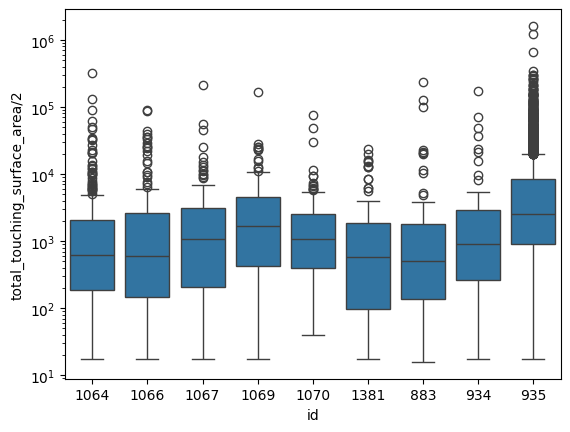

In [4]:
sns.boxplot(touching_mets,y='total_touching_surface_area/2',x='id')
#log y 
plt.yscale('log')


Disribution of contact surface area across animals separated by treatment (NOT in PAPER)

Text(0, 0.5, 'Surface Area (um2)')

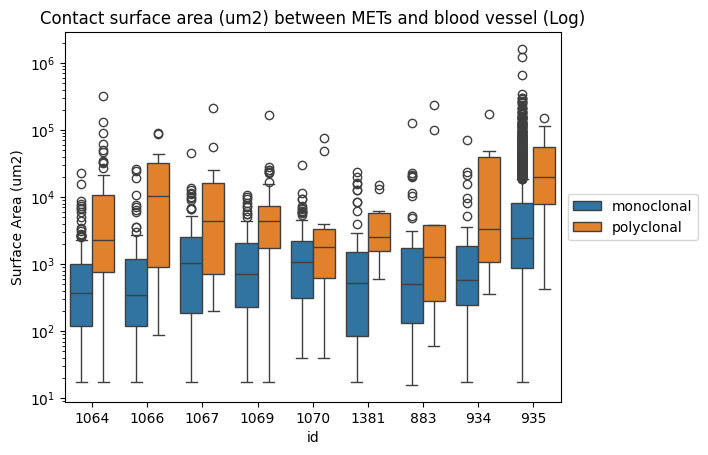

In [ ]:
sns.boxplot(touching_mets,y='total_touching_surface_area/2',x='id',hue='met_type_cat',hue_order=['monoclonal','polyclonal'])#,whis=[5,95])
plt.yscale('log')
plt.ylabel("")

#move legend outside of plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Contact surface area (um2) between METs and blood vessel (Log)")
plt.ylabel("Surface Area (um2)")

Median total surface area, but with all data included, not just touching

C:\Users\rajasekhar.p\AppData\Local\Temp\ipykernel_34856\2876709050.py:14: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.swarmplot(data=lol, hue='met_type_cat', y='median_surface_area',x='treatment', ax=axs[i], color="black",dodge=True,legend=False)
C:\Users\rajasekhar.p\AppData\Local\Temp\ipykernel_34856\2876709050.py:14: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.swarmplot(data=lol, hue='met_type_cat', y='median_surface_area',x='treatment', ax=axs[i], color="black",dodge=True,legend=False)
C:\Users\rajasekhar.p\AppData\Local\Temp\ipykernel_34856\2876709050.py:14: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.swarmplot(data=lol, hue='met_type_cat', y='

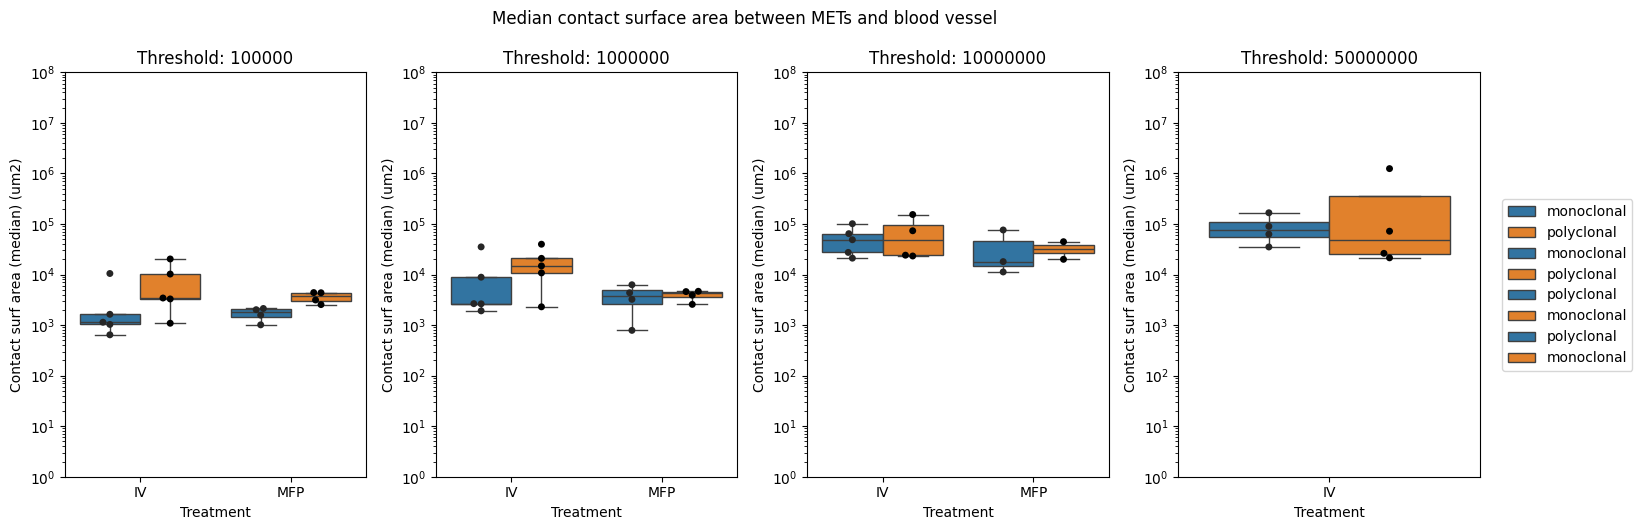

In [24]:
#loop through thresholds startin from 10^4 to 10^8 with increment, get volulme orreced for each threshold and compare the counts of the 2 treatments
thresholds = [10**5,10**6, 10**7, 5*10**7]#, 10**8, 5*10**8]#

list_of_counts = []
df_dict = {}
#plot in multiple subplots based on threshold lenght
fig, axs = plt.subplots(1,len(thresholds), figsize=(15,5))
for i,threshold in enumerate(thresholds):
    touching_df = merged_df[merged_df['number_of_touchPoints']>0]
    values = touching_df[touching_df['Volume corrected']>threshold]
    #values.groupby(['treatment','id']).size().reset_index()
    lol = values.groupby(['treatment','id','met_type_cat'])["total_touching_surface_area/2"].median().reset_index(name='median_surface_area')
    sns.boxplot(data=lol, hue='met_type_cat', y='median_surface_area',x='treatment', ax=axs[i],showfliers=False)
    sns.swarmplot(data=lol, hue='met_type_cat', y='median_surface_area',x='treatment', ax=axs[i], color="black",dodge=True,legend=False)
    axs[i].set_title(f"Threshold: {threshold}")
    axs[i].set_ylabel("Contact surf area (median) (um2)")
    axs[i].set_xlabel("Treatment")
    axs[i].get_legend().remove()
    #log scale
    axs[i].set_yscale('log')
    #set y axis as log, don't scale data



    #set y axis from 10^0 to 10^8
    axs[i].set_ylim(10**0,10**8)

    df_dict[threshold] = lol
    #lol.to_csv(f"./final_graphs/met_volume_threshold_{threshold}.csv",index=False)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#tithg plot
plt.tight_layout()
fig.suptitle("Median contact surface area between METs and blood vessel",y=1.05)
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#save graph
plt.savefig("./final_graphs/fig5/fig5_efgh_median_contact_area_thresholds.eps", format="eps",dpi=300)

In [14]:
#run stats on each dataframe in dfs
from scipy.stats import ttest_rel,ttest_ind
for df_val in df_dict.items():
    df = df_val[1]
    iv_counts = df[df['treatment']=='IV']['median_surface_area']
    mfp_counts = df[df['treatment']=='MFP']['median_surface_area']
    print(f"Threshold: {df_val[0]}")
    print("T-test unpaired")
    ttest_iv_mfp = ttest_ind(iv_counts,mfp_counts)
    print("IV vs MFP",ttest_iv_mfp)

Threshold: 100000
T-test unpaired
IV vs MFP TtestResult(statistic=1.155434984729468, pvalue=0.2648761861374702, df=16.0)
Threshold: 1000000
T-test unpaired
IV vs MFP TtestResult(statistic=2.0473829968216335, pvalue=0.05740669486563992, df=16.0)
Threshold: 10000000
T-test unpaired
IV vs MFP TtestResult(statistic=1.162572147504742, pvalue=0.2676024286655389, df=12.0)
Threshold: 50000000
T-test unpaired
IV vs MFP TtestResult(statistic=nan, pvalue=nan, df=nan)


In [23]:
#run stats on each dataframe in dffor mono vs poly for iv and do same for mfp
#use ttest_rel for paired t-test
for df_val in df_dict.items():
    try:
        df = df_val[1]
        iv_counts_mono = df[(df['treatment']=='IV') & (df['met_type_cat']=='monoclonal')]['median_surface_area']
        iv_counts_poly = df[(df['treatment']=='IV') & (df['met_type_cat']=='polyclonal')]['median_surface_area']
        print(f"Threshold: {df_val[0]}")
        print("T-test paired")
        ttest_iv_mono_poly = ttest_rel(iv_counts_mono,iv_counts_poly)
        print("IV mono vs poly",ttest_iv_mono_poly)
    except ValueError as e:
        print(f"ERROR: For threshold {df_val[0]}: {e}")


Threshold: 100000
T-test paired
IV mono vs poly TtestResult(statistic=-2.2419528872604237, pvalue=0.08843023602054484, df=4)
Threshold: 1000000
T-test paired
IV mono vs poly TtestResult(statistic=-3.0449211458839813, pvalue=0.03821764556332083, df=4)
Threshold: 10000000
T-test paired
ERROR: For threshold 10000000: unequal length arrays
Threshold: 50000000
T-test paired
IV mono vs poly TtestResult(statistic=0.8381191888289529, pvalue=0.46348338008113393, df=3)


## Nearest Vessel Thickness

C:\Users\rajasekhar.p\AppData\Local\Temp\ipykernel_34856\4282100022.py:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.swarmplot(median_ves_thickness,y='median_nearest_vessel_thickness',x='treatment',hue='met_type_cat',color='black',dodge=True,legend=False)


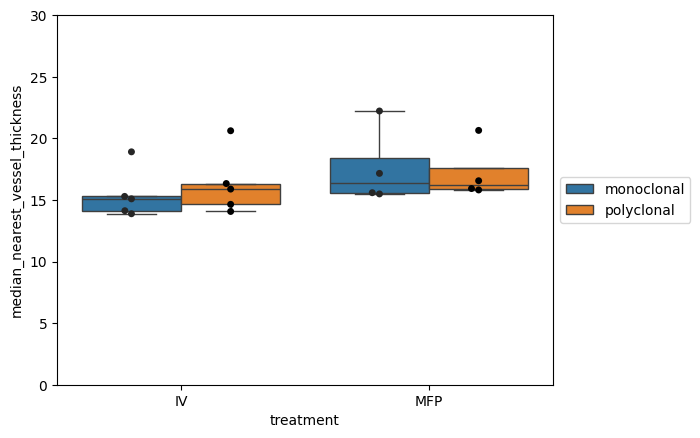

In [ ]:
#FOR ALL Data
#groupby treatment,id and met_type_cat and get median of Nearest Vessel Thickness'
median_ves_thickness = merged_df.groupby(['treatment','id','met_type_cat'])['Nearest Vessel Thickness'].median().reset_index(name='median_nearest_vessel_thickness')
sns.boxplot(median_ves_thickness,y='median_nearest_vessel_thickness',x='treatment',hue='met_type_cat',showfliers=False)
sns.swarmplot(median_ves_thickness,y='median_nearest_vessel_thickness',x='treatment',hue='met_type_cat',color='black',dodge=True,legend=False)
plt.ylim(0,30)
#legend outside
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [52]:
#calculate stats
iv_counts_mono = median_ves_thickness[(median_ves_thickness['treatment']=='IV') & (median_ves_thickness['met_type_cat']=='monoclonal')]['median_nearest_vessel_thickness']
iv_counts_poly = median_ves_thickness[(median_ves_thickness['treatment']=='IV') & (median_ves_thickness['met_type_cat']=='polyclonal')]['median_nearest_vessel_thickness']
ttest_iv_mono_poly = ttest_rel(iv_counts_mono,iv_counts_poly)
print("IV mono vs poly",ttest_iv_mono_poly)

mfp_counts_mono = median_ves_thickness[(median_ves_thickness['treatment']=='MFP') & (median_ves_thickness['met_type_cat']=='monoclonal')]['median_nearest_vessel_thickness']
mfp_counts_poly = median_ves_thickness[(median_ves_thickness['treatment']=='MFP') & (median_ves_thickness['met_type_cat']=='polyclonal')]['median_nearest_vessel_thickness']
ttest_mfp_mono_poly = ttest_rel(mfp_counts_mono,mfp_counts_poly)
print("MFP mono vs poly",ttest_mfp_mono_poly)

IV mono vs poly TtestResult(statistic=-2.9863239671114647, pvalue=0.04048490090231007, df=4)
MFP mono vs poly TtestResult(statistic=0.5957822094099618, pvalue=0.5932766435722564, df=3)


---------------

EXTRA ANALYSIS

Assess distribution of nearest vessel thickness for mets that touch vessels vs those that do not

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


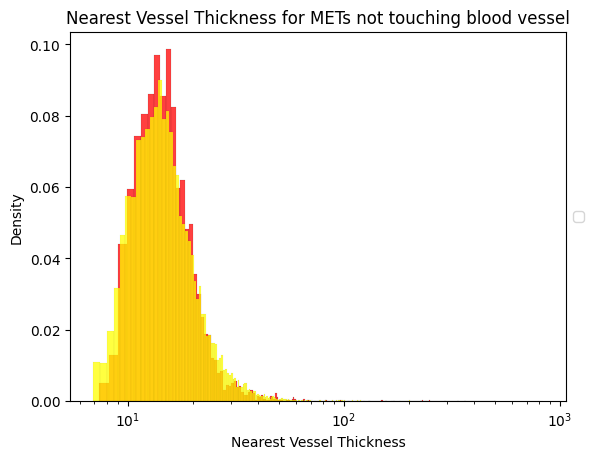

In [ ]:
#look at distribution of Narest Vessel Thickness for 'number_of_touchPoints'>0 and 'number_of_touchPoints'==0
touching_mets = merged_df[merged_df['number_of_touchPoints']>0]
not_touching_mets = merged_df[merged_df['number_of_touchPoints']==0]

sns.histplot(touching_mets,x='Nearest Vessel Thickness',stat='density',common_norm=False,color='red')
plt.title("Nearest Vessel Thickness for METs touching blood vessel")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

sns.histplot(not_touching_mets,x='Nearest Vessel Thickness',stat='density',common_norm=False,color='yellow')
plt.title("Nearest Vessel Thickness for METs not touching blood vessel")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#log x axis
plt.xscale('log')

Nearest vessel thickness for only touching METs

C:\Users\rajasekhar.p\AppData\Local\Temp\ipykernel_34856\1075579191.py:4: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.swarmplot(touching_median_ves_thickness,y='median_nearest_vessel_thickness',x='treatment',hue='met_type_cat',color='black',dodge=True,legend=False)


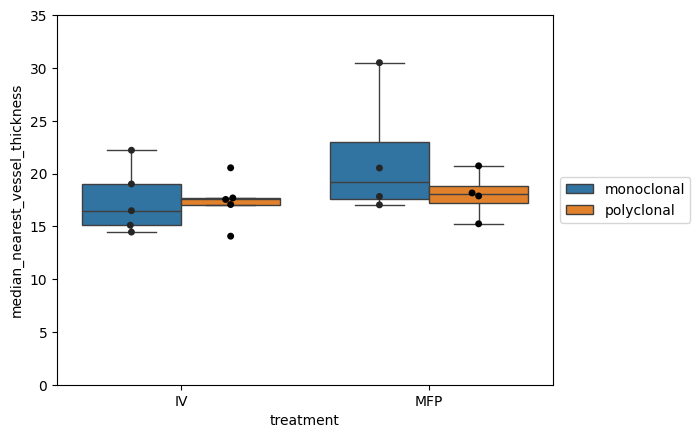

In [54]:
#groupby treatment,id and met_type_cat and get median of Nearest Vessel Thickness'
touching_median_ves_thickness = touching_mets.groupby(['treatment','id','met_type_cat'])['Nearest Vessel Thickness'].median().reset_index(name='median_nearest_vessel_thickness')
sns.boxplot(touching_median_ves_thickness,y='median_nearest_vessel_thickness',x='treatment',hue='met_type_cat',showfliers=False)
sns.swarmplot(touching_median_ves_thickness,y='median_nearest_vessel_thickness',x='treatment',hue='met_type_cat',color='black',dodge=True,legend=False)
plt.ylim(0,35)
#legend outside
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [55]:
#calculate stats
iv_counts_mono = touching_median_ves_thickness[(touching_median_ves_thickness['treatment']=='IV') & (touching_median_ves_thickness['met_type_cat']=='monoclonal')]['median_nearest_vessel_thickness']
iv_counts_poly = touching_median_ves_thickness[(touching_median_ves_thickness['treatment']=='IV') & (touching_median_ves_thickness['met_type_cat']=='polyclonal')]['median_nearest_vessel_thickness']
ttest_iv_mono_poly = ttest_rel(iv_counts_mono,iv_counts_poly)
print("TOUCHING IV mono vs poly",ttest_iv_mono_poly)

mfp_counts_mono = touching_median_ves_thickness[(touching_median_ves_thickness['treatment']=='MFP') & (touching_median_ves_thickness['met_type_cat']=='monoclonal')]['median_nearest_vessel_thickness']
mfp_counts_poly = touching_median_ves_thickness[(touching_median_ves_thickness['treatment']=='MFP') & (touching_median_ves_thickness['met_type_cat']=='polyclonal')]['median_nearest_vessel_thickness']
ttest_mfp_mono_poly = ttest_rel(mfp_counts_mono,mfp_counts_poly)
print("TOUCHING MFP mono vs poly",ttest_mfp_mono_poly)

TOUCHING IV mono vs poly TtestResult(statistic=0.09863353332232996, pvalue=0.9261743999301872, df=4)
TOUCHING MFP mono vs poly TtestResult(statistic=1.6046980528938313, pvalue=0.20690202775136946, df=3)
